Project 1- Airbnb Analysis

In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import pprint
from config import api_key
import gmaps
import numpy as np
import requests

In [2]:
#Import csv file

df = pd.read_csv("Resources/listings.csv")
df = pd.DataFrame(df)
df = df.loc[df['number_of_reviews']>1]
df = df[df['review_scores_rating'].notnull()]
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,20180827015748,2018-08-27,LoHi Secret garden at the Chickadee Cottage,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,none,those who are interested in our local brews - ...,...,t,2017-BFN-0002177,"{""Colorado State"","" the City and County of Den...",t,f,moderate,t,t,3,3.00
1,590,https://www.airbnb.com/rooms/590,20180827015748,2018-08-27,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",none,I love the diversity of my neighborhood and it...,...,t,2018-BFN-O0O5791,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,4.71
2,592,https://www.airbnb.com/rooms/592,20180827015748,2018-08-27,private,Denver short-term-rental license number 2016-B...,This is a basement room. You can sometimes he...,Denver short-term-rental license number 2016-B...,none,NaN,...,t,2016-BFN-0008735,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,1.23
3,686,https://www.airbnb.com/rooms/686,20180827015748,2018-08-27,Alexandra's Uptown Queen Bed Room,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,none,"I love my Uptown neighborhood, which is within...",...,t,2016-BFN-0008368,"{""Colorado State"","" the City and County of Den...",t,f,moderate,f,f,3,1.91
4,1940,https://www.airbnb.com/rooms/1940,20180827015748,2018-08-27,Baker Studio Close to EVERYTHING,Significant discounts for week or month+ reser...,The studio is highly functional and cozy. It ...,Significant discounts for week or month+ reser...,none,Baker is a historic neighborhood with quaint V...,...,t,344114-070056 2018-BFN-0002596,"{""Colorado State"","" the City and County of Den...",f,f,strict_14_with_grace_period,f,f,1,1.08


In [3]:
df['review_scores_rating'].isna().any()

False

In [4]:
df.dtypes
coordinates = df[['latitude','longitude']]
df_group = df.groupby('neighbourhood_cleansed')
df_group['id'].count().sort_values(ascending = False)


neighbourhood_cleansed
Five Points                     350
Highland                        286
Capitol Hill                    228
Speer                           150
Sunnyside                       139
Whittier                        118
Baker                           117
West Highland                   117
Lincoln Park                    108
City Park West                  104
Berkeley                        100
Sloan Lake                       99
West Colfax                      96
Union Station                    93
Congress Park                    93
Jefferson Park                   88
Stapleton                        86
Gateway - Green Valley Ranch     86
Cheesman Park                    85
CBD                              85
Cole                             70
Clayton                          70
Washington Park West             66
North Capitol Hill               63
Platt Park                       59
North Park Hill                  58
Northeast Park Hill              43
Skyla

In [5]:
x = df_group['id'].count()
y = df_group['review_scores_rating'].mean()
z = df_group['number_of_reviews'].sum()
neighbourhood = list(y.index)

In [6]:
df1 = pd.concat([x,y,z], axis = 1)
df1.sort_values('number_of_reviews')
#df1.loc[df1['review_scores_rating'] > 98.9 ]

,id,review_scores_rating,number_of_reviews
neighbourhood_cleansed,,,
Kennedy,1,100.000000,3
Auraria,1,100.000000,7
Sun Valley,2,100.000000,12
Wellshire,4,99.500000,56
Elyria Swansea,2,95.500000,83
DIA,1,99.000000,95
Fort Logan,10,97.700000,172
Windsor,10,94.200000,193
Marston,9,98.888889,219


In [7]:
df_norm = df1.loc[df1['number_of_reviews']>13]
df_outliers = df1.loc[df1['number_of_reviews']<13]


In [8]:
sum_norm_reviews = df_norm['number_of_reviews'].sum()
sum_norm_listings = df_norm['id'].sum()
sum_norm_neighborhoods = df_norm['id'].count()
sum_outliers_reviews = df_outliers['number_of_reviews'].sum()
sum_outliers_listings = df_outliers['id'].sum()
sum_outliers_neighborhoods = df_outliers['id'].count()
percentage_outliers_reviews = "{0:.2f}%".format((sum_outliers_reviews/(sum_outliers_reviews+sum_norm_reviews))*100)
percentage_outliers_listings = "{0:.2f}%".format((sum_outliers_listings/(sum_outliers_listings+sum_norm_listings))*100)
percentage_outliers_neighborhoods = "{0:.2f}%".format((sum_outliers_neighborhoods/(sum_outliers_neighborhoods+sum_norm_neighborhoods))*100)

In [9]:
index = ['Normal', 'Outliers', 'Outliers Percentage']
df_summary = pd.DataFrame({
    'Reviews':[sum_norm_reviews, sum_outliers_reviews, percentage_outliers_reviews],
    'Listings':[sum_norm_listings, sum_outliers_listings, percentage_outliers_listings],
    'Neighborhoods':[sum_norm_neighborhoods, sum_outliers_neighborhoods, percentage_outliers_neighborhoods]
}, index =index )
df_summary

,Reviews,Listings,Neighborhoods
Normal,183587,4077,75
Outliers,22,4,3
Outliers Percentage,0.01%,0.10%,3.85%


In [10]:
df_norm.head()

,id,review_scores_rating,number_of_reviews
neighbourhood_cleansed,,,
Athmar Park,28,95.392857,1054
Baker,117,97.247863,5484
Barnum,25,95.760000,987
Barnum West,21,96.571429,785
Bear Valley,6,98.000000,259


(90, 100)

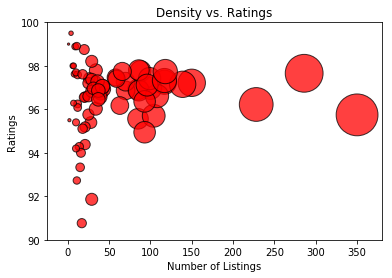

In [11]:
plt.scatter(df_norm['id'], df_norm['review_scores_rating'], marker="o", facecolors="red", edgecolors="black", alpha=0.75, s = df_norm['id']*5)
plt.xlabel('Number of Listings')
plt.ylabel('Ratings')
plt.title('Density vs. Ratings')
plt.xlim(-25,380)
plt.ylim(90,100)

In [12]:
df_norm['id'].max()

350

In [13]:
df['review_scores_rating'].mean()

96.7204116638079

In [14]:
#heatmap_data = df_group[['latitude','longitude', 'review_scores_rating']].mean()
#heatmap_data.head()

In [15]:
#heatmap_data['norm_review_scores_rating'] = heatmap_data['review_scores_rating'].apply(lambda x: ((x - x.min())/ (x.max() - x.min())))
#heatmap_data.head()
avg = df['review_scores_rating'].min()
diff = df['review_scores_rating'].max() - df['review_scores_rating'].min()
df['norm_review_scores_rating'] = df['review_scores_rating'].apply(lambda x: (x-avg)/diff) 


In [17]:
gmaps.configure(api_key = api_key)
review_fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(df[['latitude', 'longitude']], 
                                    weights = df['norm_review_scores_rating'], max_intensity = 50
                                    ,point_radius = 8)
review_fig.add_layer(heatmap_layer)
review_fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#TIM's Stuff

# #hold restaurant count half mile radius
# restaurants = []

# # loop through lat and long get restaurant count
# for index, row in heatmap_data.iterrows():
    
#     target_coordinates = str(row['latitude']) + ', ' + str(row['longitude'])
#     target_radius = 800
#     target_type = "restaurant"

#     # set up a parameters dictionary
#     params = {
#         "location": target_coordinates,
#         "radius": target_radius,
#         "type": target_type,
#         "key": api_key
#     }

#     # base url
#     base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

#     # run a request using our params dictionary
#     response = requests.get(base_url, params=params).json()
    
#     restaurants.append(len(response['results']))

In [ ]:
# TIM's Stuff

# #set locations for neighborhoods
# rest_locations = heatmap_data[['latitude', 'longitude']]

# #plot heatmap restaurants
# gmaps.configure(api_key=api_key)
# rest_fig = gmaps.figure()

# #create heatlayer
# heat_layer = gmaps.heatmap_layer(rest_locations, weights=restaurants)

# #add heatlayer to fig
# rest_fig.add_layer(heat_layer)

# rest_fig